   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   --------------------------------------- 920.8/920.8 kB 20.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Predicted Cluster: 1
Fuzzy Partition Coefficient (FPC): 0.9541305458050298


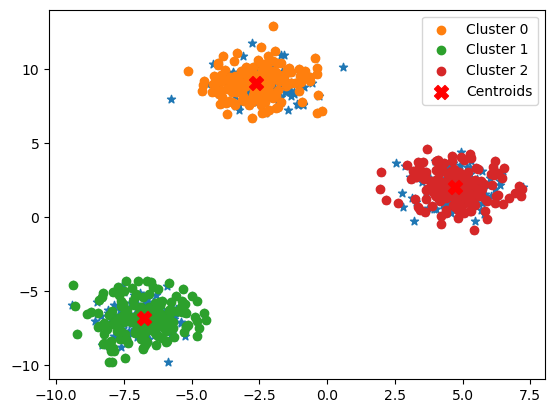

In [2]:
%pip install scikit-fuzzy

from sklearn.datasets import make_blobs
X, _ = make_blobs( n_features=2, n_samples=800, centers=3, random_state=42 )
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker="*");


#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.33, random_state=125)

#Model Building and Training
#To implement Fuzzy K-Means, we use the skfuzzy library:
import skfuzzy as fuzz

# Number of clusters
n_clusters = 3

# Perform Fuzzy K-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_train.T, c=n_clusters, m=2.0, error=0.005, maxiter=1000, init=None
)

#Predict Output
#To classify new data points, calculate the membership degrees:
# Predict cluster membership for a test point
u_test, _, _, _, _, _ = fuzz.cluster.cmeans_predict(X_test.T, cntr, m=2.0, error=0.005, maxiter=1000)

# Find the most probable cluster for the 6th test point
predicted_cluster = u_test[:, 6].argmax()
print("Predicted Cluster:", predicted_cluster)

#Model Evaluation
#Evaluate the clustering performance using the fuzzy partition coefficient (FPC):
print("Fuzzy Partition Coefficient (FPC):", fpc)

#Visualize the Clusters
# Visualize the clusters and centroids
for j in range(n_clusters):
    plt.scatter(X_train[u[j] > 0.5, 0], X_train[u[j] > 0.5, 1], label=f"Cluster {j}")

plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=100, label="Centroids")
plt.legend()
plt.show()



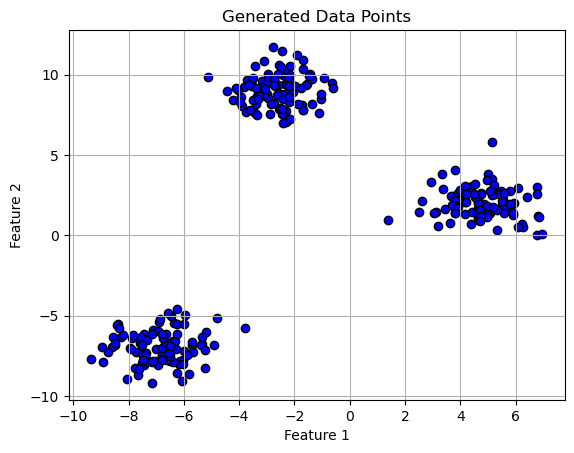

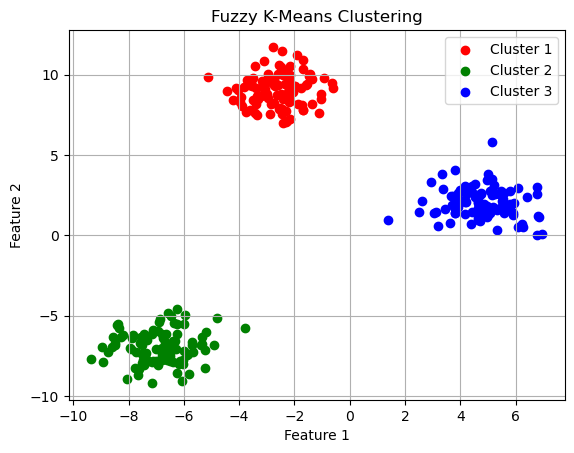

Membership values for the first data point: [0.0024291  0.99451236 0.00305853]

Fuzzy Partition Coefficient (FPC): 0.9579230167939977


In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import skfuzzy as fuzz

# Generate synthetic dataset
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

# Creating a dataset
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k')
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

# Fuzzy C-Means clustering
# Transpose the data for compatibility with skfuzzy
X_transposed = np.transpose(X)

# Set the number of clusters
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_transposed, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

# Assign clusters to each data point
cluster_membership = np.argmax(u, axis=0)

# Visualize clustered data
colors = ['red', 'green', 'blue']
for i in range(n_clusters):
    plt.scatter(X[cluster_membership == i, 0], X[cluster_membership == i, 1], color=colors[i], label=f"Cluster {i+1}")

plt.title("Fuzzy K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

# Membership values for a specific point (example: first point in X)
print("Membership values for the first data point:", u[:, 0])

# Fuzzy Partition Coefficient (FPC) - A measure of the quality of the clustering
print("\nFuzzy Partition Coefficient (FPC):", fpc)


